  # Titanic dataset analysis
  
  ## Contents
     1. Preprocessing
          1.1 Initialization and Data loading 
          1.2 Outliers Detection and Removal
     2. Feature Analysis
          2.1 Analysis of Survived Feature with Other Features
          2.2 Passenger Class Feature
              2.2.1 Relation with Fare Feature
              2.2.2 Relation with Survived Feature
          2.3 Sex Feature
              2.3.1 Relation with Survived Feature
              2.3.2 Relation based on Classes
          2.4 SibSp and Parch Features
     3. Feature Selection
     4. Training Models
         4.1 Logistic Regression
         4.2 Support Vector Machine (SVM) and Linear SVM
         4.3 Random Forrest Classifier
         4.4 K-nearest Neighbour Classifier
         4.5 Naive Bayesien Classifier
         4.6 Perception Classifier
         4.7 Stocastic Gradient Descent Classifier
         4.8 Decision Tree
         4.9 Comparison of Models
     
        Conclusion
         
  ## 1.1 Initialization and Data loading

In [1]:
#all header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


sns.set(style='white', context='notebook', palette='deep')


In [2]:
#read training set and testing set

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2 Outliers Detection and Removal

Here I will implement the Turkey method which is developed by Yessini Ghouzam 
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook


In [3]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_set,2,["Age","SibSp","Parch","Fare"])
train_set.loc[Outliers_to_drop]

/home/ansumsingh/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S


In [4]:
#drop the outliers
train_set = train_set.drop(Outliers_to_drop,axis=0).reset_index(drop=True)


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [6]:
#find null values and replace NaNs with np.nan
train_set = train_set.fillna(np.nan)
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [7]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## 2. Feature Analysis
### 2.1 Analysis of Survived Feature with Other Features

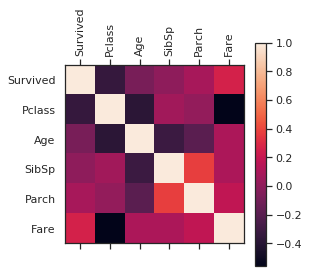

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334097,-0.076867,0.003330,0.092819,0.264613
Pclass,-0.334097,1.000000,-0.374495,0.065031,0.016440,-0.555558
Age,-0.076867,-0.374495,1.000000,-0.307129,-0.186457,0.110219
SibSp,0.003330,0.065031,-0.307129,1.000000,0.379281,0.110072
Parch,0.092819,0.016440,-0.186457,0.379281,1.000000,0.183801
Fare,0.264613,-0.555558,0.110219,0.110072,0.183801,1.000000


In [9]:
colsToPlots = ["Survived","Pclass","Age","SibSp","Parch","Fare"]
plt.matshow(train_set[colsToPlots].corr())
plt.xticks(range(len(train_set[colsToPlots].columns)), train_set[colsToPlots], rotation ='vertical')
plt.yticks(range(len(train_set[colsToPlots].columns)), train_set[colsToPlots].columns)
plt.colorbar()
plt.show()

train_set[colsToPlots].corr()

Here, it is interesting to note that **Survived** has a strong positive correlation with Fare and negative correlations with **Age** and **Pclass**, which means that with the increasing age, the chances of survival was low. Similarly, people with higher class values had low possibility of survival. To dig more on the relation of the Survival with Pclass, let us first try to find relation of PClass and Fare.  

### 2.2 Passenger Class Feature
#### 2.2.1 Relation with Fare Feature

In [10]:
train_set[["Fare","Pclass"]].corr()

,Fare,Pclass
Fare,1.000000,-0.555558
Pclass,-0.555558,1.000000


The correlation shows that the Fare feature also has negative correlation with Pclass. To dig more into the detail, let 
us plot fare vs Pclass

/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ansumsingh/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] 

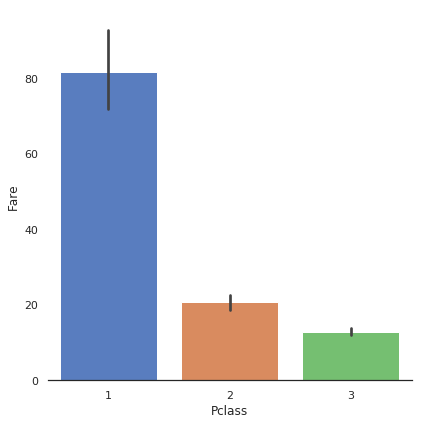

In [11]:
g = sns.factorplot(x="Pclass",y="Fare",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")

Bar graph shows that there are 3 types of passenger class, namely _Class 1_, _Class_2_, and _Class 3_. According to the dataset, those classes are based on socio-economic status (SES), which means Class 1, 2, and 3 are, respectively for upper, middle, and lower class. 

The bar graph clearly indicates that fare is higher for Class 1, compared to Class 2 and 3, which is consistent with the correlation with Fare.

Now it is interesting to see how survival rate is distributed accross theses class.

#### 2.2.2 Relation with Suvived Feature

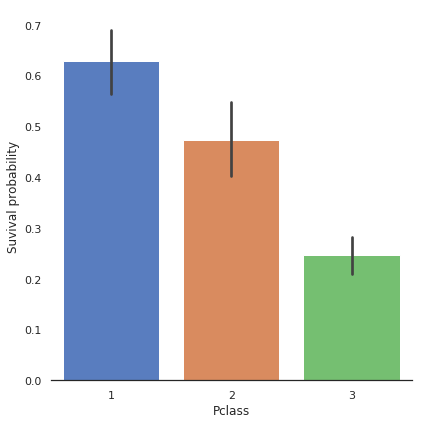

In [12]:
g = sns.factorplot(x="Pclass",y="Survived",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Suvival probability")

The bar graph clearly shows that Class 1 had higher prosibility of survival, and it it consistent with the Fare distributution. However, it is interesting to see that higher proportion of middle class also survived in the accident.

### 2.3 Sex Feature


In [13]:
train_set["Sex"].isnull().sum()


0

### 2.3.1 Relation with Survived Feature

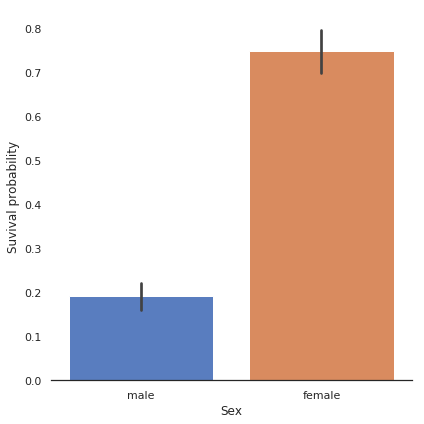

In [14]:
g = sns.factorplot(x="Sex",y="Survived",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Suvival probability")

The relations shows that higher number of female survived compared to male. Now let us examine how survived male and female are distributed with respect to Class feature.

### 2.3.2 Relation based on Classes

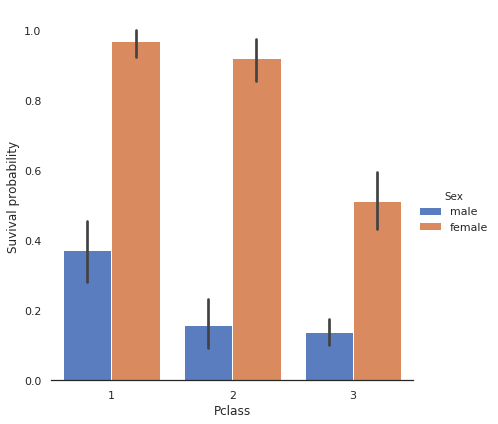

In [15]:
g = sns.factorplot(x="Pclass",y="Survived",hue="Sex",data=train_set,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Suvival probability")

The result is consistent with respect to the previous result. However, it is intersting to see that more than 90% of females from the upper and middle class survived compared to lower class. The figure for lower class passenger is around 50%.
On the other hand, around 40% of the male from the upper class survived from the accident, whereas, the figure is less than 20% for middle and lower class passengers. 

### 2.4 SibSp and Parch Features
SibSp and Parch Features stands for Siblings/Spouce and Parents/Children, respectively. Let us analyse the histogram of the both variables with respect to **Pclass** feature.

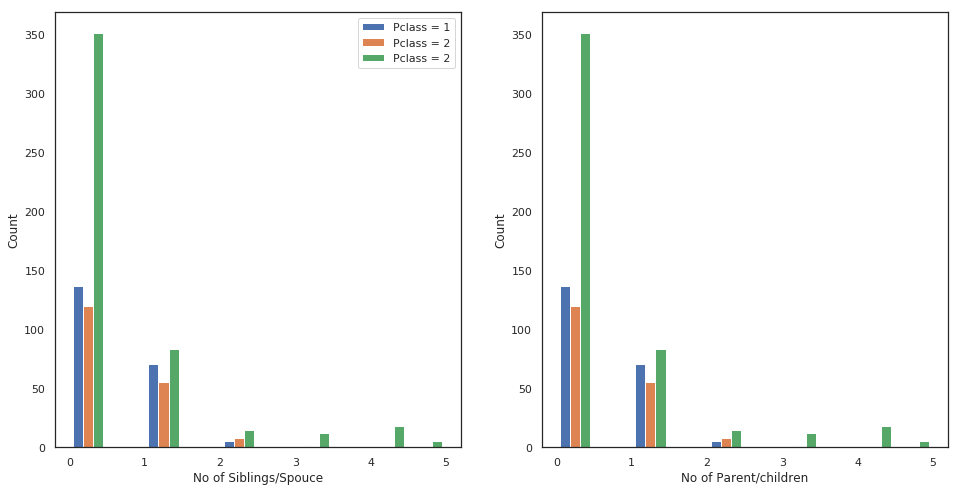

In [16]:
#Set the figure size
fig=plt.figure(1,figsize=(16,8))


fig.add_subplot(121)
SibSp = [train_set[train_set['Pclass']==1]['SibSp'],train_set[train_set['Pclass']==2]['SibSp'],train_set[train_set['Pclass']==3]['SibSp']]
plt.hist(SibSp)
plt.legend(['Pclass = 1','Pclass = 2','Pclass = 2'])
plt.ylabel('Count')
plt.xlabel('No of Siblings/Spouce')

fig.add_subplot(122)
Parch = [train_set[train_set['Pclass']==1]['Parch'],train_set[train_set['Pclass']==2]['Parch'],train_set[train_set['Pclass']==3]['Parch']]
plt.hist(SibSp)
plt.ylabel('Count')
plt.xlabel('No of Parent/children')
#ax.legend()
plt.show()

The result indicates that there were higher number of singles for all classes. Particularly, higher number of singles can be observed for Class 3. After that, people with 1 SibSp or Parch is found.

### Relation with Survived

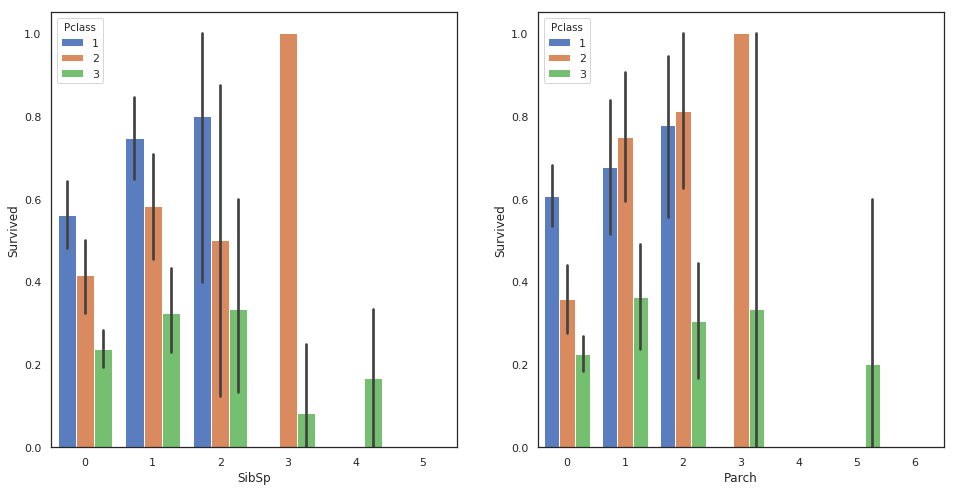

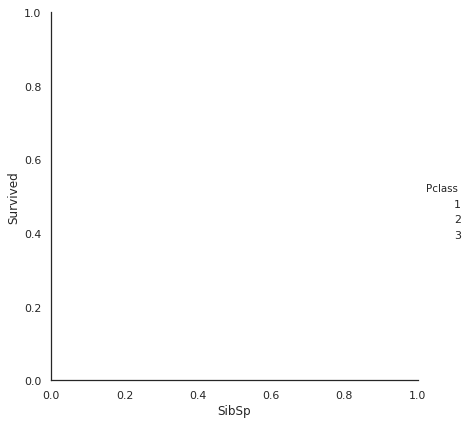

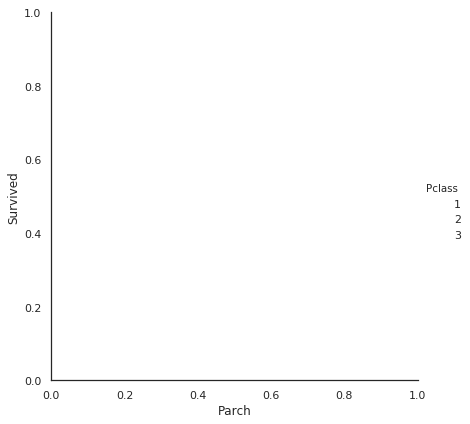

In [17]:
fig= plt.figure(1,figsize=(16,8))
ax=fig.add_subplot(121)
# SinSp vs survival
g = sns.factorplot(x="SibSp",y="Survived",hue="Pclass",data=train_set,kind="bar", size = 6 , 
palette = "muted",ax=ax)

# Parch vs survival
ax=fig.add_subplot(122)
g = sns.factorplot(x="Parch",y="Survived",hue="Pclass",data=train_set,kind="bar", size = 6 , 
palette = "muted",ax=ax)

plt.show()

The result of survival rate with respect to SibSp indicates that the survival rate for Class 3 is less compared to the other classes. However, it is interesting to note that the number of survival with 3 siblings is highest in class 2, followed by 2 and 1. It is also intersting to note that number of siblings greater than 3 is nill for class 1, thus the survival possiblility is also 0 for the case.

The result Parch feature is also similar to that of SibSp. For instance, lower survival probability is observed for the class 3. Similarly, highest proportion of survival is observed for the 2nd class passengers with 3 children of parents.  

## 3.1 Feature Selection
Here survived is the output and the remaining variables are input. For the selection of variables let us visit the correlation of all the input variables with the output feature:


In [18]:
train_set[colsToPlots].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334097,-0.076867,0.003330,0.092819,0.264613
Pclass,-0.334097,1.000000,-0.374495,0.065031,0.016440,-0.555558
Age,-0.076867,-0.374495,1.000000,-0.307129,-0.186457,0.110219
SibSp,0.003330,0.065031,-0.307129,1.000000,0.379281,0.110072
Parch,0.092819,0.016440,-0.186457,0.379281,1.000000,0.183801
Fare,0.264613,-0.555558,0.110219,0.110072,0.183801,1.000000


Let us have a look at the first row of the table. All variables have positive correlation with Suvived, except for the Age. However, SibSp and Parch features have small correlations. For now, let us select all variables for the learning.

# 4 Training Models


In [21]:
x_train= train_set[["Pclass","SibSp","Parch","Fare"]]
y_train = train_set["Survived"]


## 4.1 Logistic Regression


In [45]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)

/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4.2 Support Vector Machine (SVM) and Linear SVM (LS-SVM)

In [37]:
svc = SVC()
lsSVM =LinearSVC()
svc.fit(x_train, y_train)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
lsSVM.fit(x_train,y_train)
acc_lsSVM = round(lsSVM.score(x_train, y_train) * 100, 2)

/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 4.3 Random Forest Classifier

In [38]:
randomForest = RandomForestClassifier()
randomForest.fit(x_train,y_train)
acc_randForest = round(randomForest.score(x_train, y_train) * 100, 2)

/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 4.4 K-nearest Neighbour Classifier

In [39]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

## 4.5 Naive Bayesien Classifier

In [40]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train,y_train)
acc_naiveBayes = round(naiveBayes.score(x_train, y_train) * 100, 2)

## 4.6 Perception Classifier

In [41]:
percp = Perceptron()
percp.fit(x_train,y_train)
acc_percp = round(percp.score(x_train, y_train) * 100, 2)

/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## 4.7 Stocastic Gradient Descent Classifier

In [42]:
stocasticGDC = SGDClassifier()
stocasticGDC.fit(x_train,y_train)
acc_stocasticGDC = round(stocasticGDC.score(x_train, y_train) * 100, 2)

/home/ansumsingh/Desktop/DataScience&Keras/dataScience/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## 4.8 Decision Tree Classifier

In [43]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train,y_train)
acc_decisionTree = round(decisionTree.score(x_train, y_train) * 100, 2)

## 4.9 Comparison of Models 

In [46]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_randForest, acc_naiveBayes, acc_percp, 
              acc_stocasticGDC, acc_lsSVM, acc_decisionTree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,83.54
3,Random Forest,82.75
0,Support Vector Machines,78.09
1,KNN,75.26
2,Logistic Regression,68.56
5,Perceptron,67.76
4,Naive Bayes,67.54
6,Stochastic Gradient Decent,62.32
7,Linear SVC,61.29


The table shows that the Decision Tree ad Random Forest has maximum score compared to other methods.
## Conclusion
In this notebook data analysis on titanic dataset has been presented. The analysis shows that even thought the fare was high for the class 1 passengers, there were little disparity in the survival, specifically for women.
